# MIP Search App

Search facility for Museums in the Pandemic project. 
Birkbeck, University of London and King's College London.

Author & maintainer: andrea.ballatore [at] kcl.ac.uk

## Setup
Run this cell only once. It will take a couple of minutes.

In [2]:
#from google.colab import drive, files
#drive.mount('/content/drive')
print("Downloading source code...")
!wget -q https://www.dropbox.com/s/at7z91d2lidordi/search_utils.py?dl=1 -O search_utils.py
!wget -q https://www.dropbox.com/s/7jbbewmgdvyh3wa/museums_wattributes-2020-02-23.tsv?dl=1 -O museums_wattributes-2020-02-23.tsv
print("Downloading DB...")
!wget -q https://www.dropbox.com/s/nnaujcnzdp5y8ua/mip_corpus_search.db.zip?dl=1  -O mip_corpus_search.db.zip
!unzip -o mip_corpus_search.db.zip -d /content/
%run search_utils.py

Archive:  mip_corpus_search.db.zip
  inflating: /content/mip_corpus_search.db  
  inflating: /content/__MACOSX/._mip_corpus_search.db  
generate_derived_attributes_muse_df
ok


## Search

Syntax: * means 'any character'

In [20]:
#@title Search corpus { display-mode: "form" }
%run search_utils.py
search_string = "wars" #@param {type:"string"}
case_sensitive = False #@param {type:"boolean"}
search_websites = False
search_website_sentences = True #@param {type:"boolean"}
search_facebook = True #@param {type:"boolean"}
search_twitter = False #@param {type:"boolean"}
max_results =  130#@param {type:"integer"}
context_window =  50#@param {type:"integer"}
res_df = run_search(search_string, case_sensitive,
           search_facebook, search_twitter, search_websites, 
           search_website_sentences)
if len(res_df) > 0:
  results_html, results_page_df = generate_html_matches(res_df, search_string, 
    case_sensitive, context_window, max_results)
  display(HTML(results_html))
#res_df

generate_derived_attributes_muse_df
ok
WEBSITES: 315 matches found. N sessions: 2. Unique museums: 132
FACEBOOK: 2306 matches found. Unique museums: 384
search_regex: '(?i)\bwars\b'


res,museum_id,account,before,match,after,msg_time
198,mm.musa.096,VisitSouthEastEngland,Discover the little-known story of the Royal Navy’s heroic coastal forces in both World,Wars,", told for the first time in major new gallery 'The Night Hunters: The Royal Navy’s Coastal Forces at War ' at Explosion Museum of Naval Firepower National Museum of the Royal Navy in Gosport ⚓ See two remarkable surviving historic boats as they take centre stage in the fascinating",2021-10-15
259,mm.hha.014,hevercastle,When you step into the Long Gallery you will be able to clearly see the lineage of who was involved in the,Wars,"of the Roses. This piece was designed and drawn by Caz, Hever Castle's extremely talented Creative Programming Coordinator. It took Caz 83 hours to complete so next time you are in the Castle go and have a look!",2021-10-15
236,mm.domus.WM058,theherbert,"in their Sunday best, whilst a serene café interior by John Fitton is ‘well within the experience of everyone’, according to Hewitt. Steelworkers is a striking example by the Official War Artist Roland Pitchforth, creating a stark contrast to Paul Nash’s sumptuous rural scene from the period between the",Wars,". Displayed in two entrance areas of 10 Downing Street from 4 October 2021 for a year, the works will be seen by staff and visitors to the building. Coventry has been chosen for this year’s display to link with its title as Coventry UK City of Culture 2021 Read",2021-10-13
1441,mm.domus.SE101,NorwichCastleMuseum,"In popular culture, the African campaigns of both World",Wars,"are scarcely mentioned, overshadowed by the fields of Flanders and the beaches of Normandy. But the sacrifice made by the soldiers of the West African Frontier Force, who were uprooted from their communities and marched hundreds – sometimes thousands – of miles in the service of indifferent empires with",2021-10-13
786,mm.wiki.266,royalairforce,"of Number 617 Squadron and Royal Air Force personnel aboard the aircraft carrier. The Chief of the Air Staff also paid his respects at the Kranji Commonwealth War Graves Commission Cemetery, the final resting place of Commonwealth land and air forces who died in Southeast Asia in both World",Wars,". He laid a wreath at the Singapore War Memorial which bears the names of over 24,000 casualties of the Commonwealth forces with no known grave; a separate wreath was laid at Wing Commander Eric James Brindley Nicolson's inscription who was awarded the only Victoria Cross for the Battle of",2021-10-12
787,mm.wiki.266,royalairforce,"The Chief of the Air Staff, Air Chief Marshal Sir Mike Wigston, has paid his respects at the Kranji Commonwealth War Graves Commission Cemetery in Singapore. The Cemetery is the final resting place of Commonwealth land and air forces who died in Southeast Asia in both World",Wars,". Air Chief Marshal Wigston laid a wreath at the Singapore War Memorial which bears the names of 24,000 casualties of the Commonwealth forces who have no known grave. These include Royal Air Force personnel who died during operations over the whole of southern and eastern Asia and the surrounding",2021-10-11
636,mm.musa.344,NationalWallaceMonument,"that they can safely come to Scotland to trade. A facsimile copy of the letter is on display in The Hall of Arms in the Monument, and it was on this day (the 11th of October), that it was written, as Wallace sought to re-establish trade links following the",Wars,of Independence. #OnThisDay #WallaceMonument #LubeckLetter #WilliamWallac,2021-10-11
1098,mm.domus.SE241,TheDDayStory,would see permanently hospitalised ex-soldiers from the military hospital fall down in the street like this. They were suffering from ‘shell shock’ - now known as PTSD. He painted ‘The man in the blue suit’ to represent the mental suffering of these men who were veterans of both World,Wars,. . . . . . . #wwiiHistory #SecondWorldWar #WorldWarTwo #WorldWarii #WW2 #WarHistory #DdayMuseum #ww2HistoryAndInstagram #DdayStory #Portsmouth #Southse

<Figure size 432x288 with 0 Axes>

# Analyse search results

Run this cell to get an analysis of the composition of search results generated above in terms of museum attributes (governance, size, etc).

generate_derived_attributes_muse_df
ok
N results: 4281 • N unique museums: 654
                   n_results
twitter                 3966
website_sentences        315


star (804) world (509) rt (278) two (191) civil (168) first (155) amp (144) 
evening (142) war (125) napoleonic (122) set (119) outdoor (117) screenings (115) cinema (113) 
get (113) london (111) sciam (110) flying (106) history (104) showing (104) 

tickets (187) amp (162) war (122) back (118) story (116) september (113) day (112) 
force (111) saturday (110) awakens (105) 21 (105) roses (103) gun (103) top (103) 
wars (101) popular (96) buy (92) demand (91) could (76) may (76) 

Unique museum results: 679


,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
0,Independent:Not for profit,300,44.2,1534,19.6
1,Government:Local Authority,194,28.6,718,27.0
2,Independent:Private,43,6.3,472,9.1
3,University,38,5.6,92,41.3
4,Government:National,35,5.2,69,50.7
5,Independent:National Trust,25,3.7,183,13.7
6,Independent:Unknown,25,3.7,113,22.1
7,Independent:English Heritage,7,1.0,52,13.5
8,Unknown,5,0.7,55,9.1
9,Independent:National Trust for Scotland,4,0.6,26,15.4


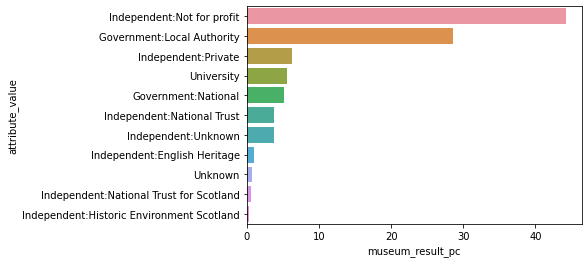

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
11,South East,115,16.9,476,24.2
12,Scotland,91,13.4,494,18.4
13,London,80,11.8,238,33.6
14,East of England,70,10.3,333,21.0
15,South West,68,10.0,422,16.1
16,North West,52,7.7,247,21.1
17,Yorkshire and The Humber,52,7.7,229,22.7
18,West Midlands,49,7.2,228,21.5
19,East Midlands,35,5.2,229,15.3
20,Wales,25,3.7,207,12.1


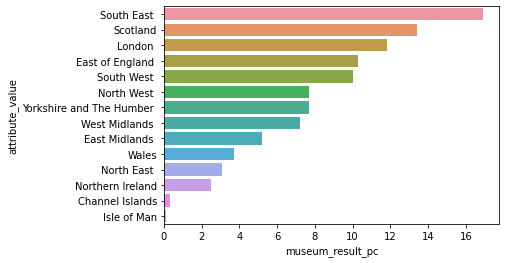

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
25,small,281,41.4,1825,15.4
26,medium,191,28.1,865,22.1
27,large,177,26.1,498,35.5
28,unknown,22,3.2,141,15.6
29,huge,7,1.0,12,58.3


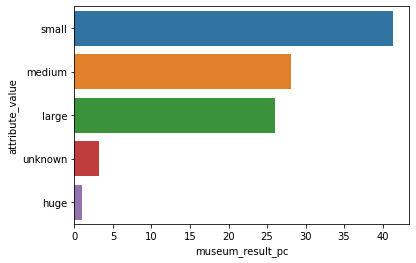

,attribute_value,n_museums,museum_result_pc,n_tot_museums,museum_attribute_pc
30,Local Histories,155,22.8,764,20.3
31,War and conflict,112,16.5,333,33.6
32,Mixed,71,10.5,166,42.8
33,Buildings,67,9.9,553,12.1
34,Arts,60,8.8,247,24.3
35,Transport,27,4.0,224,12.1
36,Sea and seafaring,26,3.8,102,25.5
37,Personality,23,3.4,176,13.1
38,Leisure and sport,22,3.2,87,25.3
39,Belief and identity,20,2.9,96,20.8


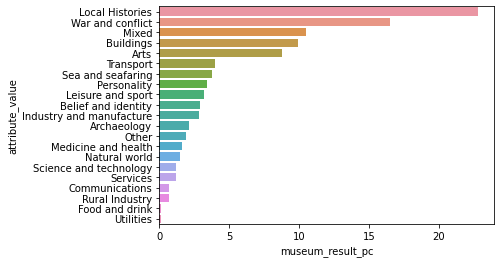

In [19]:
%run search_utils.py
#@title Default title text
token_context_size =  10#@param {type:"integer"}
assert len(res_df) > 0
res_attr_df = an_results(res_df, search_string, case_sensitive, token_context_size)
#res_attr_df

### Download results as Excel

In [15]:
# click here to download the complete search results
fn = 'search_results_{}.xlsx'.format(get_now_string())
df = results_page_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# click here to download the attribute analysis of results
fn = 'search_results_attributes_{}.xlsx'.format(get_now_string())
df = res_attr_df.copy()
df['search'] = search_string
df.to_excel(fn, index=False)
files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Backup application

This is for the platform's developer.

In [18]:
files.download('search_utils.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>